# ARTIFICAL NEURAL NETWORK

### INSTALLING THE REQURIED LIBRARIES

In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.2 kB/s 
     |████████████████████████████████| 5.8 MB 63.1 MB/s 
     |████████████████████████████████| 438 kB 58.6 MB/s 
     |████████████████████████████████| 1.6 MB 1.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5

In [1]:
pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 31.6 MB/s 


In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### DATA PREPROCESSING

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.shape

(10000, 14)

In [8]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
from sklearn.preprocessing import LabelEncoder
df['Geography']=LabelEncoder().fit_transform(df['Geography'])
df['Gender']=LabelEncoder().fit_transform(df['Gender'])

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [12]:
X=df.drop('Exited',axis=1)
y=df['Exited']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### IMPORTING THE LIBRARIES FROM KERAS TENSORFLOW

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout
from keras_tuner import RandomSearch
from tensorflow import keras
from tensorflow.keras import layers

### HYPERPARAMETER TUNING USING KERAS TUNER

In [17]:
def _build_hypermodel(hp):
  classifier = Sequential()
  classifier.add(layers.Dense(units=(df.shape[0]-1), kernel_initializer='he_uniform',activation='relu'))
  for i in range(hp.Int('num',2, 20)):
    classifier.add(layers.Dense(units=hp.Int('units_' + str(i),min_value=32,max_value=512,step=32),activation='relu'))
  classifier.add(layers.Dense(1, activation='sigmoid'))
  classifier.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),loss='binary_crossentropy',metrics=['accuracy'])
  return classifier

In [18]:
tuner = RandomSearch(
   _build_hypermodel,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='Churn_modelling')

In [19]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


### EARLY STOPPING

In [20]:
early_stopping=tf.keras.callbacks.EarlyStopping(
min_delta= 0.0001,
monitor="val_loss", 
patience=20, 
mode="auto",
verbose=1,
baseline=None, 
restore_best_weights=False)

In [21]:
tuner.search(X_train, y_train,epochs=10,validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 54s]
val_accuracy: 0.8351111014684042

Best val_accuracy So Far: 0.8606666723887125
Total elapsed time: 00h 04m 25s


In [22]:
tuner.results_summary()

Results summary
Results in project/Churn_modelling
Showing 10 best trials
Trial summary
Hyperparameters:
num: 7
units_0: 320
units_1: 160
learning_rate: 0.001
units_2: 32
units_3: 64
units_4: 32
units_5: 32
units_6: 32
Score: 0.8606666723887125
Trial summary
Hyperparameters:
num: 11
units_0: 224
units_1: 224
learning_rate: 0.001
units_2: 64
units_3: 512
units_4: 320
units_5: 288
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
Score: 0.8599999944368998
Trial summary
Hyperparameters:
num: 8
units_0: 192
units_1: 416
learning_rate: 0.01
units_2: 512
units_3: 128
units_4: 128
units_5: 192
units_6: 160
units_7: 32
units_8: 128
units_9: 320
units_10: 160
Score: 0.8386666576067606
Trial summary
Hyperparameters:
num: 5
units_0: 224
units_1: 352
learning_rate: 0.01
units_2: 480
units_3: 448
units_4: 64
units_5: 512
units_6: 448
units_7: 64
units_8: 128
units_9: 384
units_10: 32
Score: 0.8351111014684042
Trial summary
Hyperparameters:
num: 4
units_0: 288
units_1: 448
learning_rate: 

### ACCORDING TO THE TRIAL SUMMARY THE 1st TRIAL HAS THE BEST ACCURACY, SO WE CAN TAKE THE RESPECTIVE PARAMTERS OF THE 1st TRIAL

### ANN MODEL

In [24]:
classifier = Sequential()

In [25]:
classifier.add(layers.Dense(units=(df.shape[0]-1), kernel_initializer='he_uniform',activation='relu'))

In [26]:
neurons=[320,160,32,64,32,32,32]
for i in range(len(neurons)):
    classifier.add(layers.Dense(units=neurons[i],kernel_initializer='he_uniform',activation='relu'))
    classifier.add(Dropout(0.2))

In [27]:
classifier.add(layers.Dense(1, activation='sigmoid')) 

In [28]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)

In [29]:
classifier.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

### EARLY STOPPING

In [30]:
early_stopping=tf.keras.callbacks.EarlyStopping(
min_delta= 0.0001,
monitor="val_loss", 
patience=20, 
mode="auto",
verbose=1,
baseline=None, 
restore_best_weights=False)

In [31]:
ann_model=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
469/469 [==============================] - 4s 6ms/step - loss: 0.7024 - accuracy: 0.6816 - val_loss: 0.4846 - val_accuracy: 0.7975
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.5540 - accuracy: 0.7607 - val_loss: 0.4497 - val_accuracy: 0.8074
Epoch 3/50
469/469 [==============================] - 3s 5ms/step - loss: 0.5139 - accuracy: 0.7761 - val_loss: 0.4357 - val_accuracy: 0.8109
Epoch 4/50
469/469 [==============================] - 3s 5ms/step - loss: 0.5005 - accuracy: 0.7835 - val_loss: 0.4527 - val_accuracy: 0.7992
Epoch 5/50
469/469 [==============================] - 3s 5ms/step - loss: 0.4839 - accuracy: 0.7908 - val_loss: 0.4339 - val_accuracy: 0.8048
Epoch 6/50
469/469 [==============================] - 3s 5ms/step - loss: 0.4648 - accuracy: 0.7995 - val_loss: 0.4229 - val_accuracy: 0.8235
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.4601 - accuracy: 0.8042 - val_loss: 0.4474 - val_accuracy: 0.8178
Epoch 

In [32]:
ann_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### IN THIS GRAPH WE CAN ABLE TO SEE HOW THE ACCURACY HAS BEEN INCREASING WITH RESPECT TO EACH EPOCHS

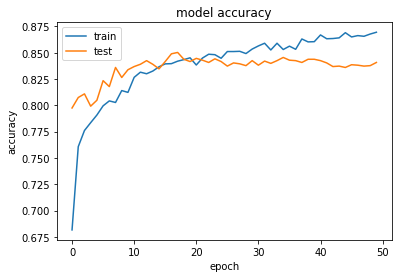

In [34]:
plt.plot(ann_model.history['accuracy'])
plt.plot(ann_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### IN THIS GRAPH WE CAN ABLE TO SEE HOW THE LOSS IS GETTING REDUCED WITH RESPECT TO THE EACH EPOCHS

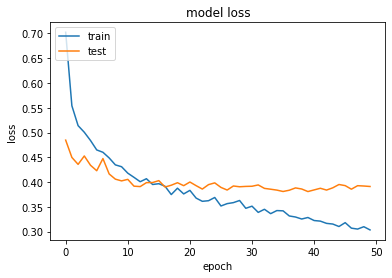

In [36]:
plt.plot(ann_model.history['loss'])
plt.plot(ann_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### MODEL PREDICTION

In [45]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [46]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### CONFUSION MATRIX

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2260,  119],
       [ 329,  292]])

### ACCURACY

In [48]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [49]:
score

0.8506666666666667